In [5]:
from connec_functions import execute_to_df, generate_sparql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import warnings

#warnings.filterwarnings('ignore')

## Author affiliations of publications

In this part, we analyse the affiliation of authors that are associated with publications in the LifeWatch special collections.

In previous lifewatch users analyses, this was only the affiliation of the publication's first authors.  
However the used 'linked-data' approach facilitates including the affiliation of all authors linked to a publication.

In [6]:
# PUBLICATIONS WITH (ONE OR MORE) AUTHORS
pub_auth = execute_to_df("1_publication-authors.sparql")

In [7]:
#explore 
pub_auth

,publication,publish_date,author
0,https://marineinfo.org/id/publication/244397,2015-01-01,https://rdflib.github.io/.well-known/genid/rdf...
1,https://marineinfo.org/id/publication/244397,2015-01-01,https://rdflib.github.io/.well-known/genid/rdf...
2,https://marineinfo.org/id/publication/244397,2015-01-01,https://rdflib.github.io/.well-known/genid/rdf...
3,https://marineinfo.org/id/publication/244397,2015-01-01,https://rdflib.github.io/.well-known/genid/rdf...
4,https://marineinfo.org/id/publication/244397,2015-01-01,https://rdflib.github.io/.well-known/genid/rdf...
...,...,...,...
96392,https://marineinfo.org/id/publication/45425,NaN,NaN
96393,https://marineinfo.org/id/publication/43700,NaN,NaN
96394,https://marineinfo.org/id/publication/43261,NaN,NaN
96395,https://marineinfo.org/id/publication/42768,NaN,NaN


In [8]:
#constrict publications to those within set publish range:
## set date range
START_YEAR = 2012
END_YEAR = 2024

## manipulate date datatype
pub_auth['publish_date'] = pd.to_datetime(pub_auth['publish_date'])
pub_auth['publish_year'] = pub_auth['publish_date'].dt.year

## assess publications with missing publish_date
pubs_with_missing_publish_year = len(pub_auth[pub_auth['publish_year'].isnull()])
print(f'number of publications with missing publish date: {pubs_with_missing_publish_year}')

## replace all NaN values with zeros & convert from float to int
pub_auth['publish_year'] = pub_auth['publish_year'].fillna(0).astype(int)

## select date range
pub_auth_12_24 = pub_auth[ (pub_auth['publish_year'] >= START_YEAR) & (pub_auth['publish_year'] <= END_YEAR) ]

number of publications with missing publish date: 366


In [9]:
pub_auth_12_24['missing_author'] = pub_auth_12_24['author'].isnull()
pub_auth_12_24

/tmp/ipykernel_461/354923881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pub_auth_12_24['missing_author'] = pub_auth_12_24['author'].isnull()


,publication,publish_date,author,publish_year,missing_author
0,https://marineinfo.org/id/publication/244397,2015-01-01,https://rdflib.github.io/.well-known/genid/rdf...,2015,False
1,https://marineinfo.org/id/publication/244397,2015-01-01,https://rdflib.github.io/.well-known/genid/rdf...,2015,False
2,https://marineinfo.org/id/publication/244397,2015-01-01,https://rdflib.github.io/.well-known/genid/rdf...,2015,False
3,https://marineinfo.org/id/publication/244397,2015-01-01,https://rdflib.github.io/.well-known/genid/rdf...,2015,False
4,https://marineinfo.org/id/publication/244397,2015-01-01,https://rdflib.github.io/.well-known/genid/rdf...,2015,False
...,...,...,...,...,...
96386,https://marineinfo.org/id/publication/303530,2018-01-01,https://rdflib.github.io/.well-known/genid/rdf...,2018,False
96387,https://marineinfo.org/id/publication/303530,2018-01-01,https://rdflib.github.io/.well-known/genid/rdf...,2018,False
96388,https://marineinfo.org/id/publication/303530,2018-01-01,https://rdflib.github.io/.well-known/genid/rdf...,2018,False
96389,https://marineinfo.org/id/publication/303530,2018-01-01,https://rdflib.github.io/.well-known/genid/rdf...,2018,False


In [10]:
pub_auth_grouped = pub_auth_12_24.groupby('publication').nunique()
print(f"For a total of {pub_auth_grouped.shape[0]} publications (included in the LifeWatch special collections & published between {START_YEAR} and {END_YEAR}),")

missing_auth = pub_auth_12_24.groupby('missing_author').nunique()
print(f"there are {missing_auth.at[True, 'publication']} publications without associated/linked authors," 
      if True in missing_auth.index else f"there are no publications without associated/linked authors,")
print(f"and there are {missing_auth.at[False, 'publication']} publications with associated/linked authors." 
     if False in missing_auth.index else f"and there are no publications with associated/linked authors. ")

For a total of 9641 publications (included in the LifeWatch special collections & published between 2012 and 2024),
there are 55 publications without associated/linked authors,
and there are 9586 publications with associated/linked authors.


In [11]:
# 3. PUBLICATION WITH AUTHORS, WITH AFFILIATION IDENTIFIER INFORMATION 
pub_auth_affil = execute_to_df("1_publication-authors-affil-info.sparql")

In [12]:
pub_auth_affil

,publication,publish_date,auth_affil_id
0,https://marineinfo.org/id/publication/244397,2015-01-01,https://marineinfo.org/id/institute/36
1,https://marineinfo.org/id/publication/244397,2015-01-01,https://marineinfo.org/id/institute/651
2,https://marineinfo.org/id/publication/317545,2019-01-01,NaN
3,https://marineinfo.org/id/publication/321803,2020-01-01,NaN
4,https://marineinfo.org/id/publication/229318,2013-01-01,NaN
...,...,...,...
11274,https://marineinfo.org/id/publication/45425,NaN,NaN
11275,https://marineinfo.org/id/publication/43700,NaN,NaN
11276,https://marineinfo.org/id/publication/43261,NaN,NaN
11277,https://marineinfo.org/id/publication/42768,NaN,NaN


In [13]:
#constrict publications to those within set publish range:
## set date range
START_YEAR = 2012
END_YEAR = 2024

## manipulate date datatype
pub_auth_affil['publish_date'] = pd.to_datetime(pub_auth_affil['publish_date'])
pub_auth_affil['publish_year'] = pub_auth_affil['publish_date'].dt.year

## assess publications with missing publish_date
pubs_with_missing_publish_year = len(pub_auth_affil[pub_auth_affil['publish_year'].isnull()])
print(f'number of publications with missing publish date: {pubs_with_missing_publish_year}')

## replace all NaN values with zeros & convert from float to int
pub_auth_affil['publish_year'] = pub_auth_affil['publish_year'].fillna(0).astype(int)

## select date range
pub_auth_affil_12_24 = pub_auth_affil[ (pub_auth_affil['publish_year'] >= START_YEAR) & (pub_auth_affil['publish_year'] <= END_YEAR) ]

number of publications with missing publish date: 347


In [14]:
pub_auth_affil_12_24['missing_affil'] = pub_auth_affil_12_24['auth_affil_id'].isnull()
pub_auth_affil_12_24

/tmp/ipykernel_461/765884342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pub_auth_affil_12_24['missing_affil'] = pub_auth_affil_12_24['auth_affil_id'].isnull()


,publication,publish_date,auth_affil_id,publish_year,missing_affil
0,https://marineinfo.org/id/publication/244397,2015-01-01,https://marineinfo.org/id/institute/36,2015,False
1,https://marineinfo.org/id/publication/244397,2015-01-01,https://marineinfo.org/id/institute/651,2015,False
2,https://marineinfo.org/id/publication/317545,2019-01-01,NaN,2019,True
3,https://marineinfo.org/id/publication/321803,2020-01-01,NaN,2020,True
4,https://marineinfo.org/id/publication/229318,2013-01-01,NaN,2013,True
...,...,...,...,...,...
11233,https://marineinfo.org/id/publication/310218,2019-01-01,NaN,2019,True
11234,https://marineinfo.org/id/publication/314397,2019-01-01,NaN,2019,True
11260,https://marineinfo.org/id/publication/355622,2022-01-01,NaN,2022,True
11263,https://marineinfo.org/id/publication/336685,2021-01-01,NaN,2021,True


In [18]:
pub_auth_grouped = pub_auth_affil_12_24.groupby('publication').nunique()
print(f"For a total of {pub_auth_grouped.shape[0]} publications,")

missing_auth_affil = pub_auth_affil_12_24.groupby('missing_affil').nunique()[['publication']]
print(f"there are {missing_auth_affil.at[True, 'publication']} publications with authors with missing affiliation identifier," 
      if True in missing_auth_affil.index else f"there are no publications with authors with missing affiliation identifier,")
print(f"and there are {missing_auth_affil.at[False, 'publication']} publications with authors with affiliation identifier." 
     if False in missing_auth_affil.index else f"and there are no publications with authors with affiliation identifier.")

For a total of 9641 publications,
there are 8712 publications with authors with missing affiliation identifier,
and there are 929 publications with authors with affiliation identifier.


In [19]:
# Table
missing_auth_affil

,publication
missing_affil,
False,929
True,8712


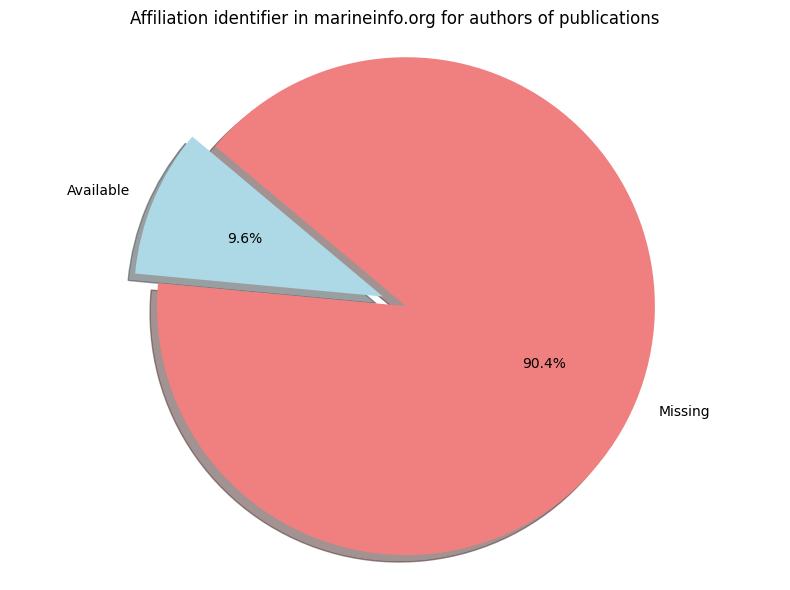

In [20]:
# Pie chart
df = pd.DataFrame(missing_auth_affil)

fig, ax = plt.subplots(figsize=(8, 6))
labels = ['Available', 'Missing']
sizes = df['publication']
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)

ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax.axis('equal')

plt.title('Affiliation identifier in marineinfo.org for authors of publications')
plt.tight_layout()
plt.show()

#### Horizontal histogram graph of number of publications per country of the (first) author affiliation

In [30]:
# Country info of publications with authors that have a recorded affiliation-ID
pub_auth_info = execute_to_df("1_publication-authors-country.sparql")
pub_auth_info

,publication,publish_date,affiliation_id,country_name,code_2,code_3,country_url,flemish
0,https://marineinfo.org/id/publication/244397,2015-01-01,https://marineinfo.org/id/institute/36,Kingdom of Belgium,BE,BEL,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,true
1,https://marineinfo.org/id/publication/244397,2015-01-01,https://marineinfo.org/id/institute/651,Kingdom of Belgium,BE,BEL,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,true
2,https://marineinfo.org/id/publication/317545,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN
3,https://marineinfo.org/id/publication/321803,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN
4,https://marineinfo.org/id/publication/229318,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
11023,https://marineinfo.org/id/publication/45425,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11024,https://marineinfo.org/id/publication/43700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11025,https://marineinfo.org/id/publication/43261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11026,https://marineinfo.org/id/publication/42768,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#constrict publications to those within set publish range:
## set date range
START_YEAR = 2012
END_YEAR = 2024

## manipulate date datatype
pub_auth_info['publish_date'] = pd.to_datetime(pub_auth_info['publish_date'])
pub_auth_info['publish_year'] = pub_auth_info['publish_date'].dt.year

## assess publications with missing publish_date
pubs_with_missing_publish_year = len(pub_auth_info[pub_auth_info['publish_year'].isnull()])
print(f'number of publications with missing publish date: {pubs_with_missing_publish_year}')

## replace all NaN values with zeros & convert from float to int
pub_auth_info['publish_year'] = pub_auth_info['publish_year'].fillna(0).astype(int)

## select date range
pub_auth_info_12_24 = pub_auth_info[ (pub_auth_info['publish_year'] >= START_YEAR) & (pub_auth_info['publish_year'] <= END_YEAR) ]

number of publications with missing publish date: 347


In [32]:
pub_auth_info_12_24['missing_affil'] = pub_auth_info_12_24['affiliation_id'].isnull()
pub_auth_info_12_24

/tmp/ipykernel_461/3026126574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pub_auth_info_12_24['missing_affil'] = pub_auth_info_12_24['affiliation_id'].isnull()


,publication,publish_date,affiliation_id,country_name,code_2,code_3,country_url,flemish,publish_year,missing_affil
0,https://marineinfo.org/id/publication/244397,2015-01-01,https://marineinfo.org/id/institute/36,Kingdom of Belgium,BE,BEL,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,true,2015,False
1,https://marineinfo.org/id/publication/244397,2015-01-01,https://marineinfo.org/id/institute/651,Kingdom of Belgium,BE,BEL,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,true,2015,False
2,https://marineinfo.org/id/publication/317545,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,2019,True
3,https://marineinfo.org/id/publication/321803,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,2020,True
4,https://marineinfo.org/id/publication/229318,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,2013,True
...,...,...,...,...,...,...,...,...,...,...
10982,https://marineinfo.org/id/publication/310218,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,2019,True
10983,https://marineinfo.org/id/publication/314397,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,2019,True
11009,https://marineinfo.org/id/publication/355622,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,2022,True
11012,https://marineinfo.org/id/publication/336685,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,2021,True


In [33]:
# there are 2 species cases for country:
#      <https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AEU> = EU affiliations 
#      <https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AXAA> = personal affiliations 

pub_auth_info_12_24.loc[ pub_auth_info_12_24['country_url'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AEU' , 'country_name'] = 'Europe'
pub_auth_info_12_24.loc[ pub_auth_info_12_24['country_url'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AEU' , 'code_2'] = 'EU'
pub_auth_info_12_24.loc[ pub_auth_info_12_24['country_url'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AEU' , 'code_3'] = 'EUR'

pub_auth_info_12_24.loc[ pub_auth_info_12_24['country_url'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AXAA' , 'country_name'] = 'personal'
pub_auth_info_12_24.loc[ pub_auth_info_12_24['country_url'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AXAA' , 'code_2'] = 'personal'
pub_auth_info_12_24.loc[ pub_auth_info_12_24['country_url'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AXAA' , 'code_3'] = 'personal'

In [45]:
# wrangle dataframe into right format 
count_info = pub_auth_info_12_24.groupby('code_2').nunique()
count_info['non-flemish'] = 0
count_info['other'] = count_info['publication']

count_info.loc['BE', 'non-flemish'] = count_info.loc['BE', 'publication'] - count_info.loc['BE', 'flemish']
count_info.loc['BE', 'other'] = 0

In [47]:
## Table of number of publications with authors that are affiliated to the listed countries 
count_info_reduced = count_info[['flemish', 'non-flemish', 'other']]
count_info_reduced

,flemish,non-flemish,other
code_2,,,
BE,1,743,0


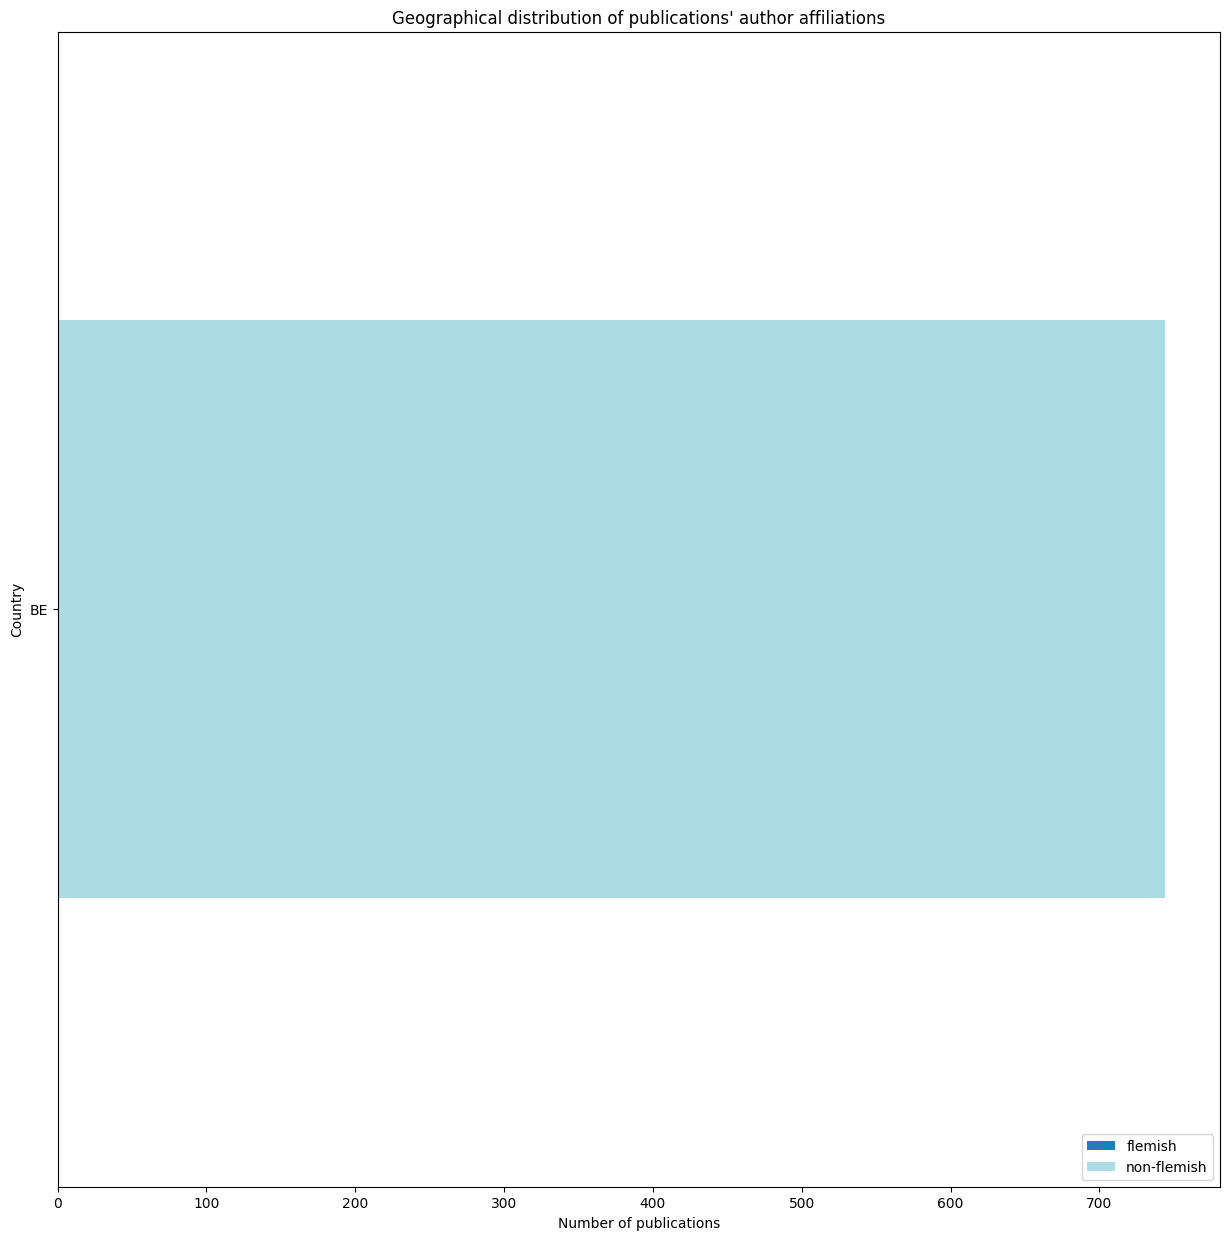

In [49]:
## Horizontal histogram graph
# side note: for those publications for which the author affiliation could be linked to a name!
colors = ['#1e81b0', '#abdbe3', 'lightgrey']
barh_top20 = count_info_reduced.plot(kind='barh', y=['flemish','non-flemish', 'other'], stacked=True, color=colors, figsize=(15, 15))

barh_top20.set_title("Geographical distribution of publications' author affiliations")
barh_top20.set_xlabel('Number of publications')
barh_top20.set_ylabel('Country')
barh_top20.legend(['flemish', 'non-flemish'], loc="lower right")
plt.show()